In [2]:
from graphviz import Source

## Attempt 1

Drawing by referrencing [the graph](https://www.graphviz.org/Gallery/directed/switch.html)  
Mechanics: listing out all the nodes, classify them according to the naming system (i.e. a,b,c,d) and connect all the nodes  
Further Investigation: The behavior of the default package of arranging the layout, read carefully about the neato package




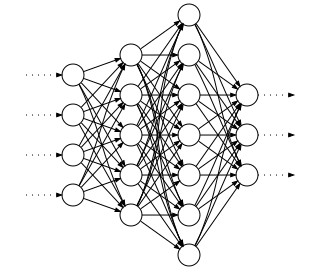

In [2]:
temp="""
digraph neuron_network {
    
        graph [rankdir=LR]
        node [width=0.3 height=0.3 label="" shape = circle]
        edge [arrowsize = 0.5]
        
        { node [style=invis]
		1 2 3 4 5 6 7
        }
        
        { node []
		a1 a2 a3 a4 b1 b2 b3 b4 b5 c1 c2 c3 c4 c5 c6 c7 d1 d2 d3
        }
        
       { edge [style=dotted arrowhead = normal]  
        
       1-> a1 
       2-> a2 
       3-> a3 
       4-> a4 
       
        d1-> 5
        d2-> 6
        d3-> 7
        
       }
       
       
       a1 -> {b1 b2 b3 b4 b5}
       a2 -> {b1 b2 b3 b4 b5}
       a3 -> {b1 b2 b3 b4 b5}
       a4 -> {b1 b2 b3 b4 b5}
        
        b1 -> {c1 c2 c3 c4 c5 c6 c7}
        b2 -> {c1 c2 c3 c4 c5 c6 c7}
        b3 -> {c1 c2 c3 c4 c5 c6 c7}
        b4 -> {c1 c2 c3 c4 c5 c6 c7}
        b5 -> {c1 c2 c3 c4 c5 c6 c7}
        
        c1 -> {d1 d2 d3}
        c2 -> {d1 d2 d3}
        c3 -> {d1 d2 d3}
        c4 -> {d1 d2 d3}
        c5 -> {d1 d2 d3}  
        c6 -> {d1 d2 d3}
        c7 -> {d1 d2 d3}
        
}"""

s = Source(temp)
s

## Attempt 2

Drawing Mechanics: Each layer is a subgraph, [subgraph cluster referrence](https://www.graphviz.org/Gallery/directed/cluster.html)  

Improve on investigating the mechanics of pointing arrow, why some of the arrows are curly ?

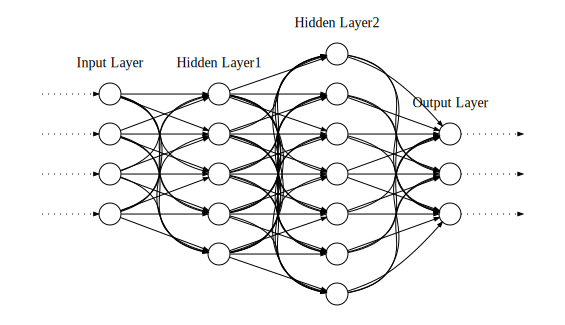

In [24]:
#using subgraph structure to have vertical nodes and edges --> graphviz edge style?
#problematic part: line are not all the way straight

temp2="""
digraph neuron_network {
    
        graph [rankdir=LR]
        node [width=0.3 height=0.3 shape = circle label=""]
        edge [arrowsize = 0.5 length=5]
        
        subgraph cluster_0{
        rank = same
        node [style=invis]
        1
        2
        3
        4
        color=white
        }

        subgraph cluster_1{
        rank = same
        a1
        a2
        a3
        a4
        label="Input Layer"
        color=white
        }
        
        subgraph cluster_2{
        b1
        b2
        b3
        b4
        b5
        label = "Hidden Layer1"
        color=white
        }
        
        subgraph cluster_3{
        c1
        c2
        c3
        c4
        c5
        c6
        c7
        label = "Hidden Layer2"
        color=white
        }
        
        subgraph cluster_4{
        d1
        d2
        d3
        label = "Output Layer"
        color=white
        }
        
        subgraph cluster_5{
        rank = same
        node [style=invis]
        5
        6
        7
        color=white
        }

       
        { edge [style=dotted arrowhead = normal]  
        
       1-> a1 
       2-> a2 
       3-> a3 
       4-> a4 
       
        d1-> 5
        d2-> 6
        d3-> 7
        
       }
       
       a1 -> {b1 b2 b3 b4 b5} 
       a2 -> {b1 b2 b3 b4 b5}
       a3 -> {b1 b2 b3 b4 b5}
       a4 -> {b1 b2 b3 b4 b5}
        
        b1 -> {c1 c2 c3 c4 c5 c6 c7}
        b2 -> {c1 c2 c3 c4 c5 c6 c7}
        b3 -> {c1 c2 c3 c4 c5 c6 c7}
        b4 -> {c1 c2 c3 c4 c5 c6 c7}
        b5 -> {c1 c2 c3 c4 c5 c6 c7}
        
        c1 -> {d1 d2 d3}
        c2 -> {d1 d2 d3}
        c3 -> {d1 d2 d3}
        c4 -> {d1 d2 d3}
        c5 -> {d1 d2 d3}  
        c6 -> {d1 d2 d3}
        c7 -> {d1 d2 d3}
        
}"""

s = Source(temp2)
s

## Attempt 3

Inserting mathematical notations, relying on other packages, need to run installation more carefully.  

[dot2tex](https://dot2tex.readthedocs.io/en/latest/usage_guide.html) libary

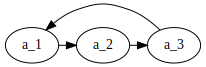

In [22]:
# Insert notations on edges
    
temp4="""   
   digraph G {
    a_1 [texlbl="$\frac{\gamma}{x^2}$"];
    a_1-> a_2 -> a_3 -> a_1 ;
}
    """
s = Source(temp4)
s


## Attempt 4

Inserting mathematical notations, relying on using png as node content  
Further investigate on why the html table has to be named as struct  
How to scale the picture


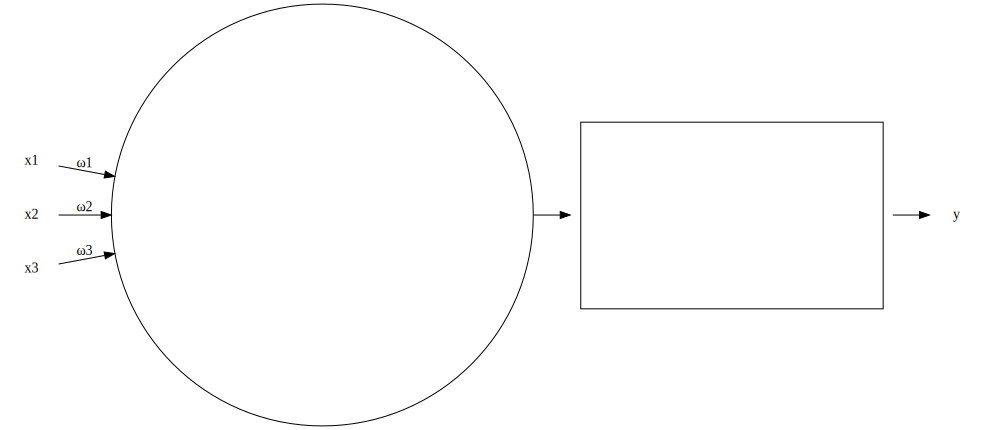

In [69]:
# Graphviz inserting images --> inserting images as part of the node content
# In particular, an image can be contained in a node of any shape, not just a rectangle
# not an intelligent way, the size of images are not adjustable 

temp3="""

digraph picture {
    graph [rankdir=LR]
    node [shape=plaintext];
    
    {node []
     x1 x2 x3 y
    }
    
    {node [width=0.1 height=0.1 label="" shape = circle image="eqn.png" size=1] 
    a
    }
    
     part1 [label=<<TABLE BORDER="0" CELLBORDER="1">
      <TR><TD><IMG SRC="eqn.png"/></TD></TR>
    </TABLE>>];
    
    
    x1  -> a [label = <&omega;1>]
    x2  -> a [label = <&omega;2>]
    x3  -> a [label = <&omega;3>]
     
    a -> part1
    part1 -> y
    
    
    }"""

s = Source(temp3)
s
    
    

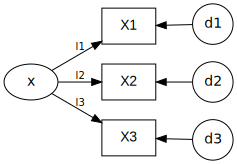

In [6]:
temp3="""

digraph threevar {
  rankdir=LR;
  size="8,4";
  node [fontname="Helvetica" fontsize=14 shape=box];
  edge [fontname="Symbol" fontsize=10];
  center=1;
  {rank=min k }
  {rank=same X1 X2 X3 }
  {rank=max z1 z2 z3 }
  z1 [shape=circle fontname="Symbol" label="d1"];
  z2 [shape=circle fontname="Symbol" label="d2"];
  z3 [shape=circle fontname="Symbol" label="d3"];
  k [fontname="Symbol" label="x" shape="ellipse"];
  k -> X1 [label="l1"];
  k -> X2 [label="l2"];
  k -> X3 [label="l3"];
  z1 -> X1;
  z2 -> X2;
  z3 -> X3;
}"""

s = Source(temp3)
s
    

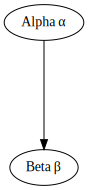

In [51]:
temp3="""

digraph G {
  a [ label=<Alpha &#945;>]
  b [ label=<Beta &beta;>]

  a -> b [minlen=3]
}

"""

s = Source(temp3)
s

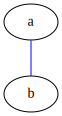

In [14]:
temp="""
strict graph { 
  a -- b
  a -- b
  b -- a [color=blue]
} """

s = Source(temp)
s

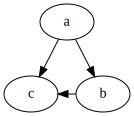

In [21]:
temp="""
digraph G {
  a -> c;
  a -> b;
  b -> c [constraint=false];
  
}"""

s = Source(temp)
s